In [4]:
import serial
import time
import csv

# Set up the serial connection (adjust 'COM12' to your specific port)
ser = serial.Serial('COM12', 9600, timeout=1)  # For Windows
# ser = serial.Serial('/dev/ttyUSB0', 9600, timeout=1)  # For Linux
# ser = serial.Serial('/dev/ttyACM0', 9600, timeout=1)  # Alternative for Linux

time.sleep(2)  # Wait for the serial connection to initialize

# Open the CSV file in write mode
with open('dht11Readings.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write headers to the CSV file
    writer.writerow(["Timestamp", "Temperature (C)", "Humidity (%)"])

    try:
        while True:
            if ser.in_waiting > 0:  # Check if data is available to read
                line = ser.readline().decode('utf-8').strip()
                print(f"Arduino says: {line}")

                # Parse the temperature and humidity from the line
                if "Temperature" in line and "Humidity" in line:
                    try:
                        temp_str = line.split(",")[0].split(":")[1].strip()
                        humidity_str = line.split(",")[1].split(":")[1].strip()
                        temperature = float(temp_str.split(" ")[0])
                        humidity = float(humidity_str.split(" ")[0])
                        print(f"Parsed Temperature: {temperature} C, Humidity: {humidity} %")

                        # Get the current time for the timestamp
                        timestamp = time.strftime("%Y-%m-%d %H:%M:%S")
                        
                        # Write data to CSV
                        writer.writerow([timestamp, temperature, humidity])

                    except (IndexError, ValueError) as e:
                        print(f"Error parsing data: {e}")

            time.sleep(2)  # Delay for stability

    except KeyboardInterrupt:
        print("Exiting...")

    finally:
        ser.close()  # Close the serial connection

Arduino says: Temperature: 19.70 *C, Humidity: 56.00 %
Parsed Temperature: 19.7 C, Humidity: 56.0 %
Arduino says: Temperature: 19.60 *C, Humidity: 56.00 %
Parsed Temperature: 19.6 C, Humidity: 56.0 %
Arduino says: Temperature: 19.50 *C, Humidity: 56.00 %
Parsed Temperature: 19.5 C, Humidity: 56.0 %
Arduino says: Temperature: 19.50 *C, Humidity: 56.00 %
Parsed Temperature: 19.5 C, Humidity: 56.0 %
Arduino says: Temperature: 19.40 *C, Humidity: 56.00 %
Parsed Temperature: 19.4 C, Humidity: 56.0 %
Arduino says: Temperature: 19.40 *C, Humidity: 56.00 %
Parsed Temperature: 19.4 C, Humidity: 56.0 %
Arduino says: Temperature: 19.40 *C, Humidity: 56.00 %
Parsed Temperature: 19.4 C, Humidity: 56.0 %
Arduino says: Temperature: 19.40 *C, Humidity: 56.00 %
Parsed Temperature: 19.4 C, Humidity: 56.0 %
Arduino says: Temperature: 19.40 *C, Humidity: 56.00 %
Parsed Temperature: 19.4 C, Humidity: 56.0 %
Arduino says: Temperature: 19.40 *C, Humidity: 56.00 %
Parsed Temperature: 19.4 C, Humidity: 56.0 %


Model Coefficients: Slope = 8.680417834456986, Intercept = -104.57851451683538


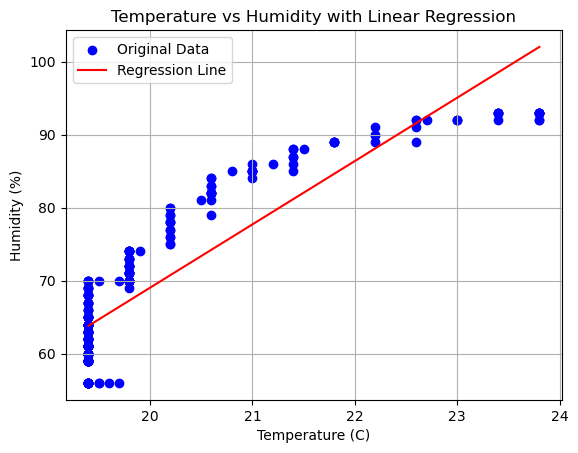

In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('dht11Readings.csv')  # Replace with your CSV file path
X = data['Temperature (C)'].values.reshape(-1, 1)  # Independent variable
y = data['Humidity (%)'].values  # Dependent variable

model = LinearRegression()
model.fit(X, y)

# Output the coefficients
print(f"Model Coefficients: Slope = {model.coef_[0]}, Intercept = {model.intercept_}")

# Predict humidity over a range of temperature values
min_temp = X.min()
max_temp = X.max()
test_temperatures = np.linspace(min_temp, max_temp, 100).reshape(-1, 1)
predicted_humidity = model.predict(test_temperatures)

# Plot the original data
plt.scatter(X, y, color='blue', label='Original Data')

# Plot the regression line
plt.plot(test_temperatures, predicted_humidity, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity with Linear Regression')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


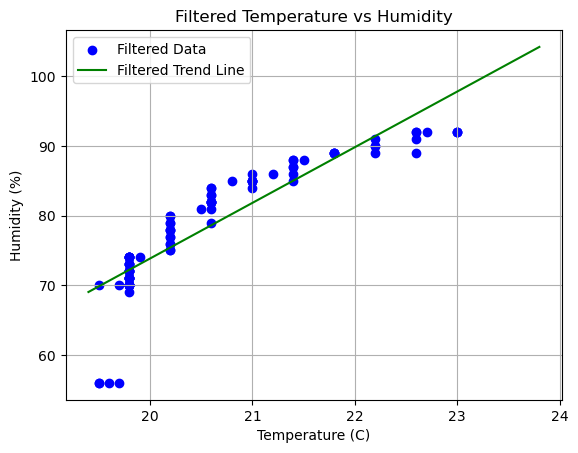

In [18]:
lower_bound = data['Temperature (C)'].quantile(0.05)
upper_bound = data['Temperature (C)'].quantile(0.95)

filtered_data = data[(data['Temperature (C)'] > lower_bound) & 
                     (data['Temperature (C)'] < upper_bound)]

# Independent variable (Temperature) and dependent variable (Humidity) for filtered data
X_filtered = filtered_data['Temperature (C)'].values.reshape(-1, 1)
y_filtered = filtered_data['Humidity (%)'].values

# Retrain the Linear Regression model on filtered data
model_filtered = LinearRegression()
model_filtered.fit(X_filtered, y_filtered)

# Predict humidity with the new model on the same range of temperatures
predicted_humidities_filtered = model_filtered.predict(test_temperatures)

# Plot the filtered data
plt.scatter(X_filtered, y_filtered, color='blue', label='Filtered Data')

# Plot the new regression line
plt.plot(test_temperatures, predicted_humidities_filtered, color='green', label='Filtered Trend Line')

# Add labels and title
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity (%)')
plt.title('Filtered Temperature vs Humidity')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [23]:
print(f"Original Model Coefficients: Slope = {model.coef_[0]}, Intercept = {model.intercept_}")
print(f"Filtered Model Coefficients: Slope = {model_filtered.coef_[0]}, Intercept = {model_filtered.intercept_}")

Original Model Coefficients: Slope = 8.680417834456986, Intercept = -104.57851451683538
Filtered Model Coefficients: Slope = 7.989821728901522, Intercept = -85.95822864663874
